In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd

file_path = '/content/Population of the Republic of Kazakhstan by gender and type of locality (as of July 1 2024).csv'
df = pd.read_csv(file_path)

top_5 = df.head(5)
top_5


,Districts (adm2 level),Total population,men,women,urban_population,urban_population_men,urban_population_women,rural_population,rural_population_men,rural_population_women
0,Semei с.а.,"311,694","149,017","162,677","311,604","148,967","162,637",90,50,40
1,Кurchatov с.а.,"10,217","4,987","5,230","10,217","4,987","5,230",-,-,-
2,Abai district,"13,756","6,906","6,850",-,-,-,"13,756","6,906","6,850"
3,Aksuat district,"19,128","9,826","9,302",-,-,-,"19,128","9,826","9,302"
4,Ayagoz distict,"64,968","32,699","32,269","41,820","20,717","21,103","23,148","11,982","11,166"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Districts (adm2 level)  227 non-null    object
 1   Total population        227 non-null    object
 2   men                     227 non-null    object
 3   women                   227 non-null    object
 4   urban_population        227 non-null    object
 5   urban_population_men    227 non-null    object
 6   urban_population_women  227 non-null    object
 7   rural_population        227 non-null    object
 8   rural_population_men    227 non-null    object
 9   rural_population_women  227 non-null    object
dtypes: object(10)
memory usage: 17.9+ KB


In [ ]:
df.describe()

,Districts (adm2 level),Total population,men,women,urban_population,urban_population_men,urban_population_women,rural_population,rural_population_men,rural_population_women
count,227,227,227,227,227,227,227,227,227,227
unique,220,227,225,226,104,104,104,194,193,193
top,Zhambyl district,"311,694","9,835","14,815",-,-,-,-,-,-
freq,3,1,2,2,124,124,124,34,34,34


In [ ]:
cols_to_convert = [
    "Total population", "men", "women",
    "urban_population", "urban_population_men", "urban_population_women",
    "rural_population", "rural_population_men", "rural_population_women"
]

df[cols_to_convert] = df[cols_to_convert].replace({"-": np.nan, ',': ''}, regex=True)

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)

total_men = df["men"].sum()
total_women = df["women"].sum()

print(f"Total number of men: {total_men}")
print(f"Total number of women: {total_women}")

Total number of men: 9847877
Total number of women: 10311830


In [ ]:
total_men = df["men"].sum()
total_women = df["women"].sum()

print(f"Total number of men: {total_men}")
print(f"Total number of women: {total_women}")


Total number of men: 9847877
Total number of women: 10311830


In [ ]:
print(df[['urban_population', 'rural_population']].head(10))  # Display the first 10 rows for inspection

   urban_population  rural_population
0          311604.0              90.0
1           10217.0               NaN
2               NaN           13756.0
3               NaN           19128.0
4           41820.0           23148.0
5               NaN           17457.0
6               NaN           32379.0
7            3258.0           16678.0
8            6240.0           28845.0
9               NaN           13250.0


In [ ]:
print(df['urban_population'].unique())
print(df['rural_population'].unique())

[311604.  10217.     nan  41820.   3258.   6240. 180792.  57448.  64475.
  15454.  30407.  18136.   4090.  12127.  11132.   6800.  47570. 576517.
  22799.  49876.   2202.  30470.  27968.  56898.  52200.  41306.  85351.
  65676. 324158.  66719. 359072.  35861. 433788.  25778.  28546.  45479.
 170284.  30011.  21029.  19016.  53285.  17826. 522872.  77608.  11089.
  43600. 177051.  57905.  28549.   9109. 269962.  28145.  34565. 122684.
  34832.  28570. 318922.  33367.  37299.   7438. 279280.  76134.   8752.
 345016.  51817. 137114. 221562.   8557.   6897.   8119.  12975. 232709.
  56093.  74798.  44613.  62850.  34257.  32036.  89653.  17324.  68702.
 356327.  49440.  18383.  42415.  18239. 393604. 279844. 350179. 229104.
 219282. 267785. 377054. 358218. 333501. 199220. 249640. 210086. 262747.
 230468. 268684. 205214. 301428. 233174.]
[9.00000e+01         nan 1.37560e+04 1.91280e+04 2.31480e+04 1.74570e+04
 3.23790e+04 1.66780e+04 2.88450e+04 1.32500e+04 2.59880e+04 4.20140e+04
 1.39360e

In [ ]:

print(df['urban_population'].isna().sum())
print(df['rural_population'].isna().sum())


124
34


In [ ]:
urban_population = df['urban_population'].sum()
rural_population = df['rural_population'].sum()

print(f"Urban population: {urban_population}")
print(f"Rural population: {rural_population}")


Urban population: 12630546.0
Rural population: 7529161.0


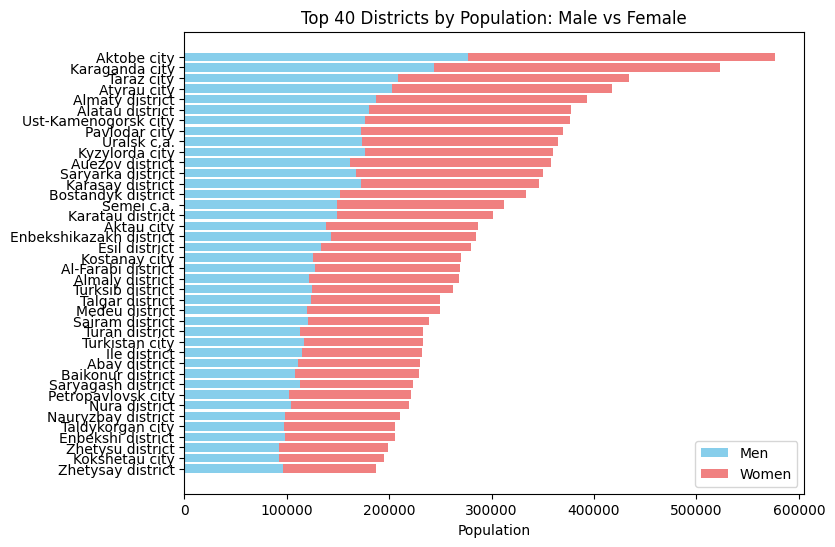

In [ ]:
import matplotlib.pyplot as plt

df_top5 = df.sort_values(by='Total population', ascending=False).head(40)

plt.figure(figsize=(8, 6))
plt.barh(df_top5['Districts (adm2 level)'], df_top5['men'], color='skyblue', label='Men')
plt.barh(df_top5['Districts (adm2 level)'], df_top5['women'], color='lightcoral', left=df_top5['men'], label='Women')
plt.xlabel('Population')
plt.title('Top 40 Districts by Population: Male vs Female')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

<ipython-input-12-46e84c39e6e6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Population Type', y='Population', data=df_melted, palette='Set2', split=True)


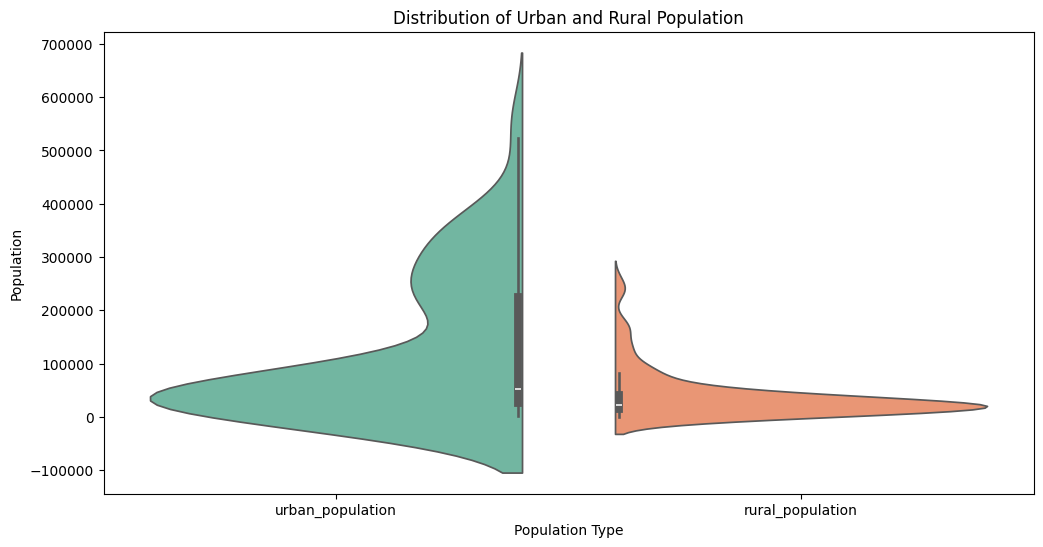

In [ ]:
import seaborn as sns

df_melted = df.melt(id_vars='Districts (adm2 level)', value_vars=['urban_population', 'rural_population'],
                    var_name='Population Type', value_name='Population')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Population Type', y='Population', data=df_melted, palette='Set2', split=True)
plt.title('Distribution of Urban and Rural Population')
plt.show()


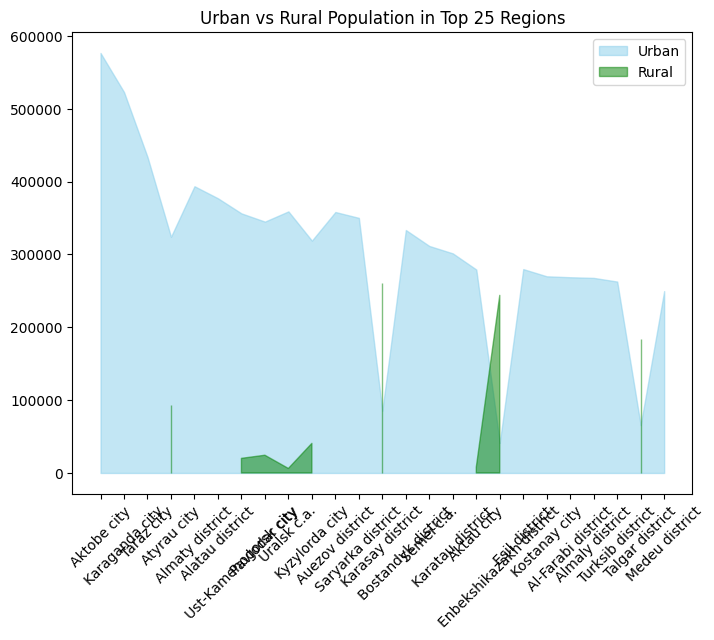

In [ ]:
df_top5 = df.sort_values(by='Total population', ascending=False).head(25)

plt.figure(figsize=(8, 6))
plt.fill_between(df_top5['Districts (adm2 level)'], df_top5['urban_population'], color="skyblue", alpha=0.5, label='Urban')
plt.fill_between(df_top5['Districts (adm2 level)'], df_top5['rural_population'], color="green", alpha=0.5, label='Rural')
plt.xticks(rotation=45)
plt.title('Urban vs Rural Population in Top 25 Regions')
plt.legend()
plt.show()


In [ ]:
df_top20 = df.head(20)

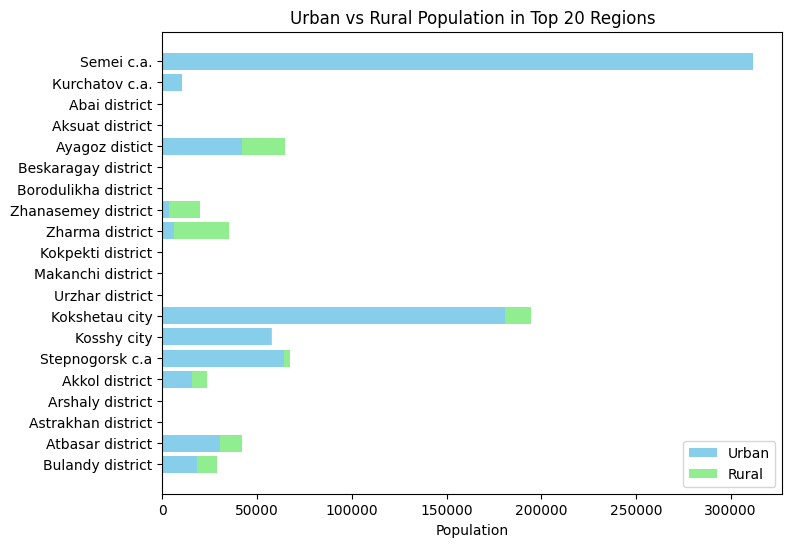

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(df_top20['Districts (adm2 level)'], df_top20['urban_population'], color='skyblue', label='Urban')
plt.barh(df_top20['Districts (adm2 level)'], df_top20['rural_population'], color='lightgreen', left=df_top20['urban_population'], label='Rural')
plt.xlabel('Population')
plt.title('Urban vs Rural Population in Top 20 Regions')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


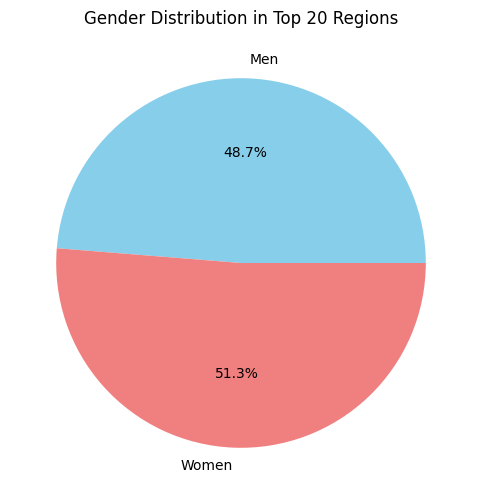

In [ ]:
total_men = df_top20['men'].sum()
total_women = df_top20['women'].sum()

gender_data = [total_men, total_women]
labels = ['Men', 'Women']

plt.figure(figsize=(6, 6))
plt.pie(gender_data, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution in Top 20 Regions')
plt.show()

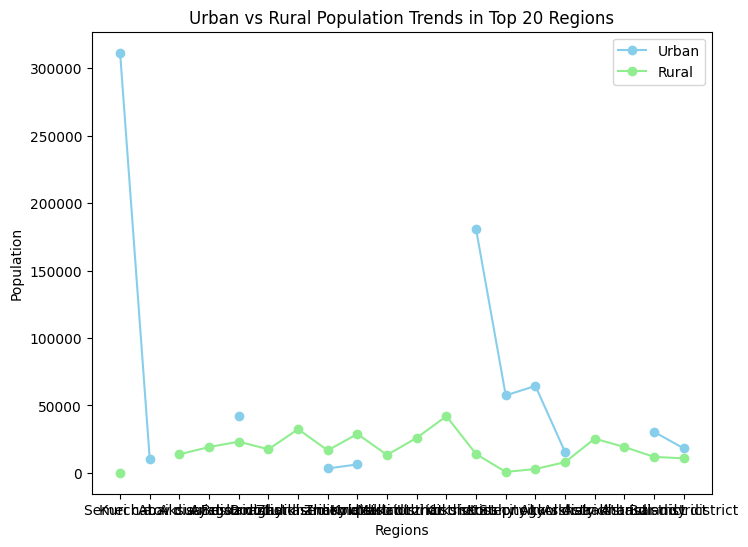

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df_top20['Districts (adm2 level)'], df_top20['urban_population'], marker='o', linestyle='-', color='skyblue', label='Urban')
plt.plot(df_top20['Districts (adm2 level)'], df_top20['rural_population'], marker='o', linestyle='-', color='lightgreen', label='Rural')
plt.title('Urban vs Rural Population Trends in Top 20 Regions')
plt.xlabel('Regions')
plt.ylabel('Population')
plt.legend()
plt.show()


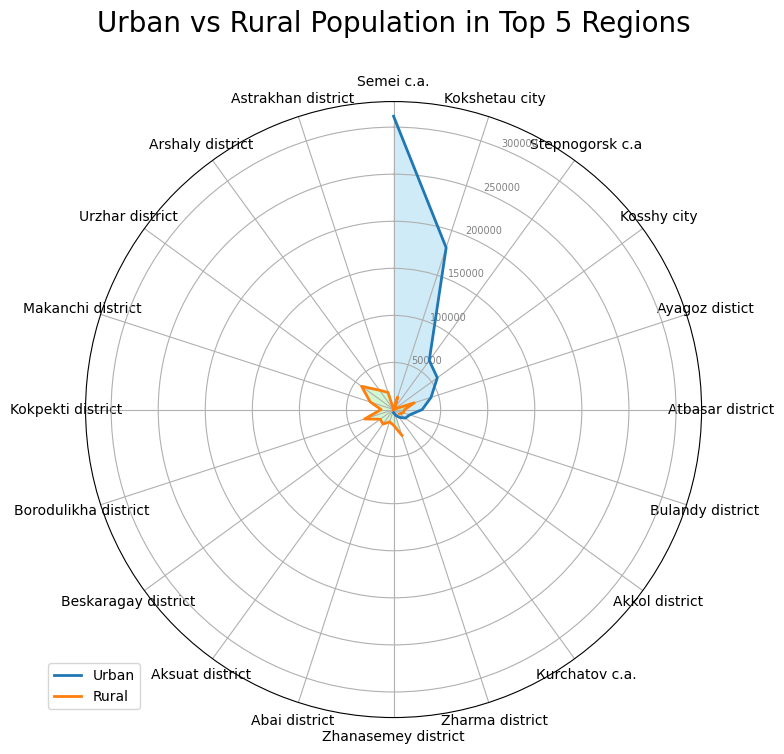

In [ ]:
from math import pi

df_top20 = df_top20.sort_values(by='urban_population', ascending=False)
categories = df_top20['Districts (adm2 level)']
urban = df_top20['urban_population']
rural = df_top20['rural_population']

N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

ax.plot(angles, list(urban) + [urban.iloc[0]], linewidth=2, linestyle='solid', label='Urban')
ax.fill(angles, list(urban) + [urban.iloc[0]], color='skyblue', alpha=0.4)

ax.plot(angles, list(rural) + [rural.iloc[0]], linewidth=2, linestyle='solid', label='Rural')
ax.fill(angles, list(rural) + [rural.iloc[0]], color='lightgreen', alpha=0.4)

plt.xticks(angles[:-1], categories)
plt.yticks(color="grey", size=7)
plt.title('Urban vs Rural Population in Top 5 Regions', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


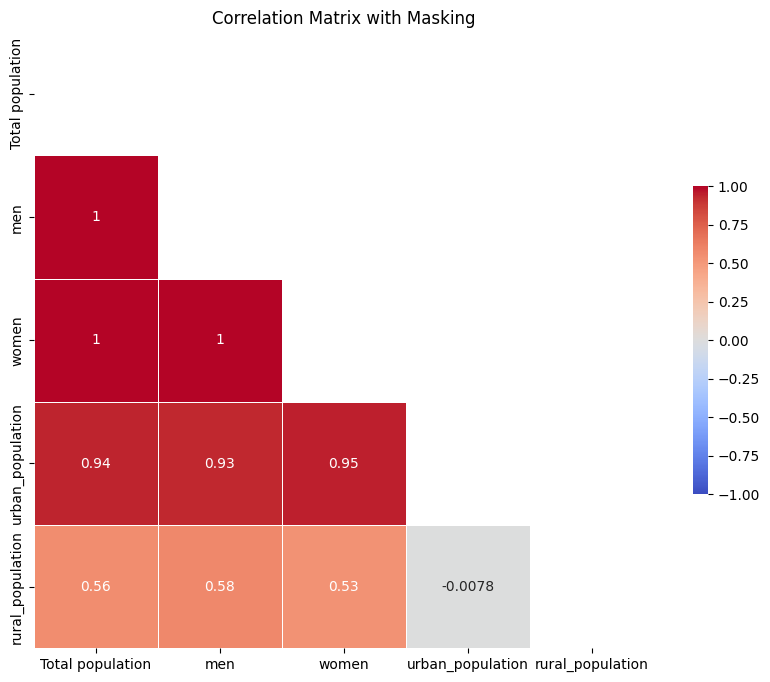

In [ ]:
import numpy as np

corr = df[['Total population', 'men', 'women', 'urban_population', 'rural_population']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", vmax=1, vmin=-1, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix with Masking')
plt.show()


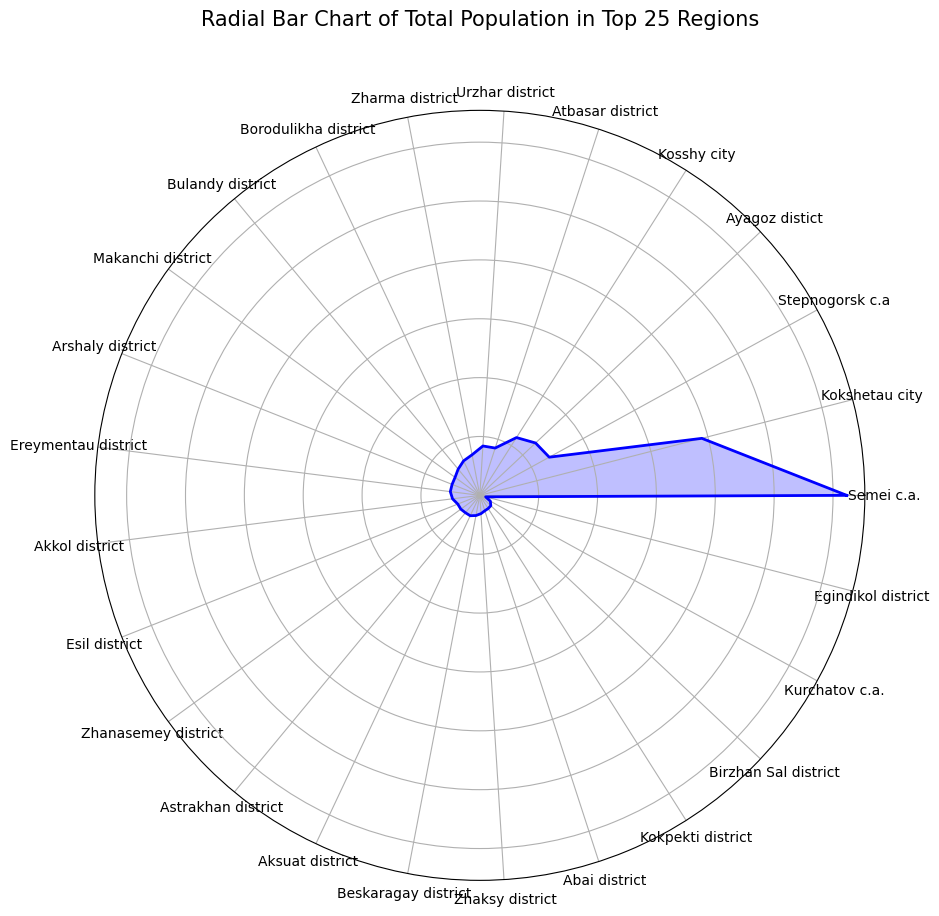

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_25 = df.head(25).sort_values(by='Total population', ascending=False)
categories = df_25['Districts (adm2 level)']
values = df_25['Total population']

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

values = values.tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, color='black', size=10)

ax.set_rlabel_position(30)
plt.title('Radial Bar Chart of Total Population in Top 25 Regions', size=15, color='black', y=1.1)

plt.show()


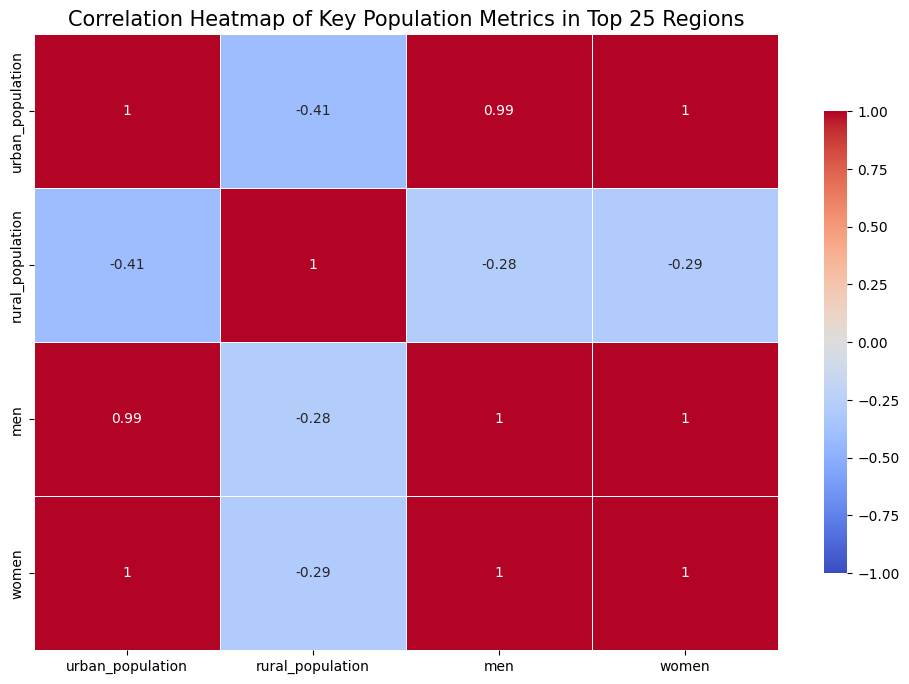

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_heatmap = df.head(25)[['urban_population', 'rural_population', 'men', 'women']]

plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap of Key Population Metrics in Top 25 Regions', size=15)
plt.show()


>

------------------------

# If you found these visualizations helpful, please consider giving them an **upvote**! ⬆️


------------------------------------------------------------------------------------------------------------------------------------------------

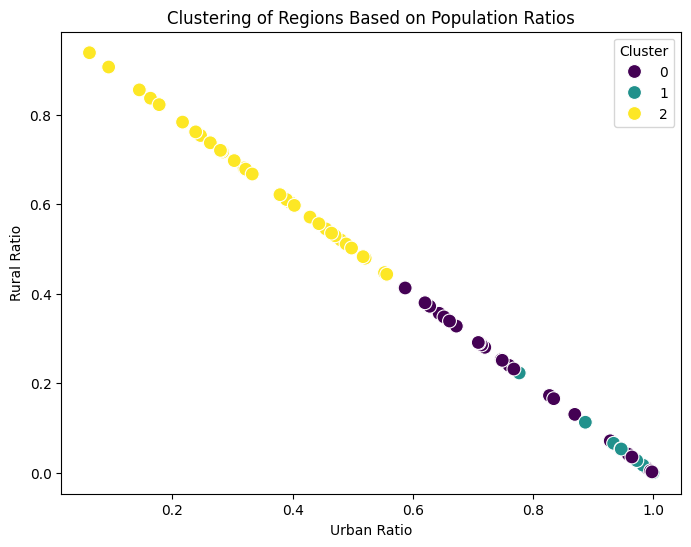

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.83      0.91      0.87        11

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



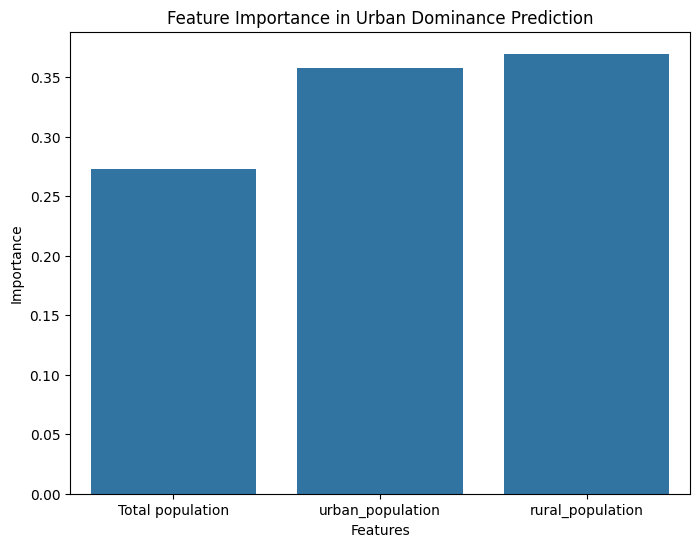

Regression Coefficients: [1. 1.]
Intercept: 2.9103830456733704e-11


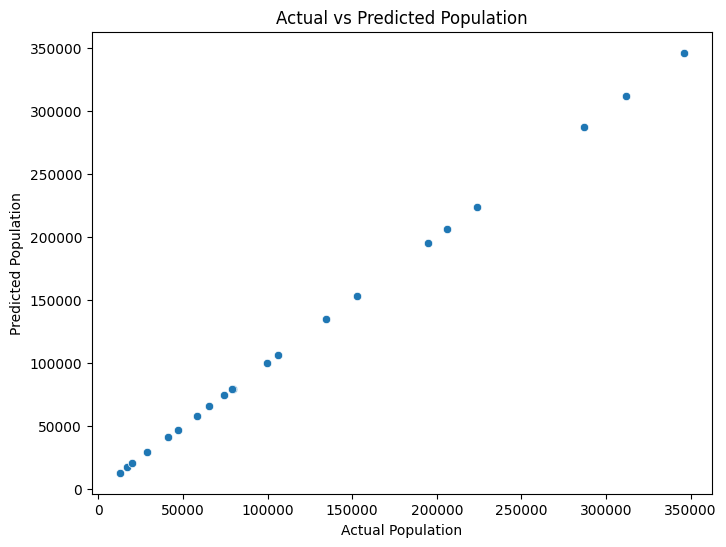

R^2 Score: 1.0


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Population of the Republic of Kazakhstan by gender and type of locality (as of July 1 2024).csv')

# Data Preprocessing
cols_to_convert = [
    "Total population", "men", "women",
    "urban_population", "urban_population_men", "urban_population_women",
    "rural_population", "rural_population_men", "rural_population_women"
]

df[cols_to_convert] = df[cols_to_convert].replace({"-": np.nan, ",": ""}, regex=True)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)

# Drop rows with missing data
df = df.dropna()

# Feature Engineering
df['urban_ratio'] = df['urban_population'] / df['Total population']
df['rural_ratio'] = df['rural_population'] / df['Total population']

# 1. Clustering
# Select features for clustering
features = df[['urban_ratio', 'rural_ratio', 'Total population']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['urban_ratio'], y=df['rural_ratio'],
    hue=df['cluster'], palette='viridis', s=100
)
plt.title('Clustering of Regions Based on Population Ratios')
plt.xlabel('Urban Ratio')
plt.ylabel('Rural Ratio')
plt.legend(title='Cluster')
plt.show()

# 2. Classification
# Prepare data for classification
df['is_urban_dominated'] = (df['urban_ratio'] > 0.5).astype(int)
X = df[['Total population', 'urban_population', 'rural_population']]
y = df['is_urban_dominated']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importance = classifier.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=importance)
plt.title('Feature Importance in Urban Dominance Prediction')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# 3. Predictive Analysis (Regression)
# Create target variable (e.g., Total population as a function of others)
X = df[['urban_population', 'rural_population']]
y = df['Total population']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the Model
print("Regression Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Predictions
y_pred = regressor.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Population')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.show()

# Calculate R^2 Score
from sklearn.metrics import r2_score
print("R^2 Score:", r2_score(y_test, y_pred))
